In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [16]:
results_db_2 = pd.read_pickle('data/results_db_dummy.pkl')
results_db_disa_2 = pd.read_pickle('data/results_db_disa_dummy.pkl')
results_db_disa_seller_2 = pd.read_pickle('data/results_db_disa_seller_dummy.pkl')
results_db_agree_buyer_2 = pd.read_pickle('data/results_db_agree_buyer_dummy.pkl')
results_db_agree_seller_2 = pd.read_pickle('data/results_db_agree_seller_dummy.pkl')

In [17]:
final_db_distributive_nego  = pd.concat([results_db_2
,results_db_disa_2
,results_db_disa_seller_2
,results_db_agree_buyer_2
,results_db_agree_seller_2],axis =0, ignore_index=True)

In [18]:
final_db_distributive_nego_accept = final_db_distributive_nego[~final_db_distributive_nego.reject]


final_db_distributive_nego_accept['G_2'] = (final_db_distributive_nego_accept['U_b'] - final_db_distributive_nego_accept['U_s']).abs() / (final_db_distributive_nego_accept['U_b'].abs() + final_db_distributive_nego_accept['U_s'].abs()) 

C:\Users\31721\AppData\Local\Temp\ipykernel_1104\4225599326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_db_distributive_nego_accept['G_2'] = (final_db_distributive_nego_accept['U_b'] - final_db_distributive_nego_accept['U_s']).abs() / (final_db_distributive_nego_accept['U_b'].abs() + final_db_distributive_nego_accept['U_s'].abs())


In [19]:
#final_db_distributive_nego_accept['Control']
def calculate_value(offer,cost):
    return offer - cost

def sellers_value(offer,cost_of_production):
    return calculate_value(offer,cost_of_production)
def buyers_value(offer,willingness_to_pay):
    return calculate_value(willingness_to_pay,offer)



def gini_coeff(sellers_value,buyers_value):
    
    return np.absolute( buyers_value - sellers_value)/(buyers_value + sellers_value)
    

cost_of_production = 40
willingness_to_pay = 60

In [30]:
B_NBS_farthest,S_NBS_farthest

(50, 50)

In [115]:
final_db_distributive_nego_accept['RFD']

0      0.10
1      0.10
2      0.04
3      0.04
4     -0.00
       ... 
491    0.10
492    0.10
493    0.14
494    0.10
495   -0.00
Name: RFD, Length: 467, dtype: float64

In [134]:
#sms.Mediation??

B_NBS = buyers_value(50,willingness_to_pay)

S_NBS =  sellers_value(50,cost_of_production)


B_NBS_farthest = max( np.absolute(buyers_value(100,willingness_to_pay) - B_NBS) ,np.absolute( buyers_value(0,willingness_to_pay)- B_NBS ) ) 

S_NBS_farthest = max( np.absolute(sellers_value(100,cost_of_production) - S_NBS) ,np.absolute( sellers_value(0,cost_of_production)- S_NBS ) ) 



final_db_distributive_nego_accept['B_fairness'] = (final_db_distributive_nego_accept['U_b'] - B_NBS ) /B_NBS_farthest 
final_db_distributive_nego_accept['S_fairness'] = (final_db_distributive_nego_accept['U_s'] - S_NBS ) /S_NBS_farthest

#final_db_distributive_nego_accept['RFD'] =   final_db_distributive_nego_accept.apply(lambda x: min(x['B_fairness'], x['S_fairness']), axis =1)*-1

final_db_distributive_nego_accept['RFD'] =   (final_db_distributive_nego_accept['B_fairness'] - final_db_distributive_nego_accept['S_fairness'] )/2    #.apply(lambda x: min(x['B_fairness'], x['S_fairness']), axis =1)*-1





#Modified_Relative_Difference_P = (Actual_Player - NBS_Player) / (Utility_Max_P - Utility_Min_P)

C:\Users\31721\AppData\Local\Temp\ipykernel_1104\3306234995.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_db_distributive_nego_accept['B_fairness'] = (final_db_distributive_nego_accept['U_b'] - B_NBS ) /B_NBS_farthest
C:\Users\31721\AppData\Local\Temp\ipykernel_1104\3306234995.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_db_distributive_nego_accept['S_fairness'] = (final_db_distributive_nego_accept['U_s'] - S_NBS ) /S_NBS_farthest
C:\Users\31721\AppData\Local\Temp\ipykernel_1104\3

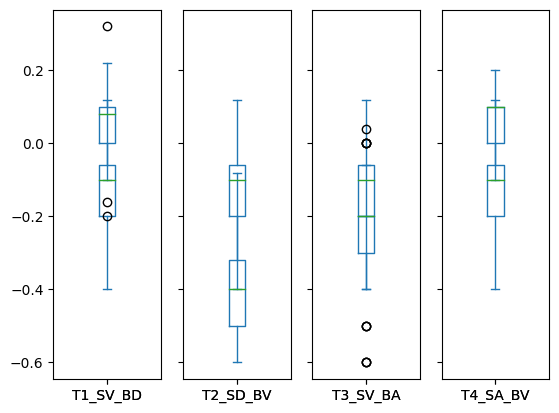

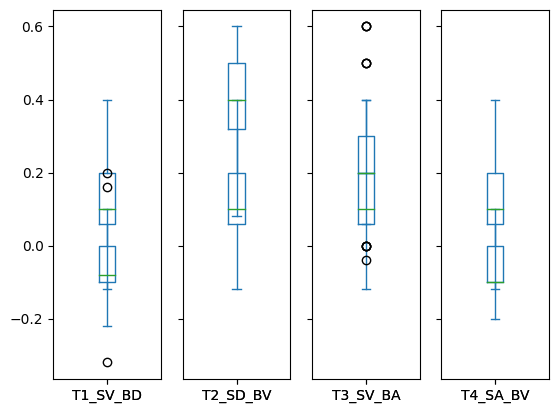

In [135]:
import matplotlib.pyplot as plt

fig,ax1 = plt.subplots(1,4,sharey=1)
fig,ax2 = plt.subplots(1,4,sharey=1)


for i,j in enumerate(['T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV']):
    temp_filter_df = final_db_distributive_nego_accept[ (final_db_distributive_nego_accept[j]==1) | ( final_db_distributive_nego_accept['Control']==1)]
    
    temp_filter_df.groupby(j).plot(x =j, y = 'B_fairness',kind='box',ax = ax1[i],label = j)
    temp_filter_df.groupby(j).plot(x =j, y = 'S_fairness',kind='box',ax = ax2[i],label = j)
    #temp_filter_df.plot(x =j, y = 'S_fairness',kind='box',ax = ax2[i],label = j)
plt.show()

In [136]:
import numpy as np
from scipy.interpolate import interp1d

def gini(v, n_new = 1000):
    """Compute Gini coefficient of array of values"""
    v_abs = np.sort(np.abs(v))
    cumsum_v = np.cumsum(v_abs)
    n = len(v_abs)
    vals = np.concatenate([[0], cumsum_v/cumsum_v[-1]])
    x = np.linspace(0, 1, n+1)
    f = interp1d(x=x, y=vals, kind='previous')
    xnew = np.linspace(0, 1, n_new+1)
    dx_new = 1/(n_new)
    vals_new = f(xnew)
    return 1 - 2 * np.trapz(y=vals_new, x=xnew, dx=dx_new)

gini(np.array([0, 0, 0,0,0,0,0]))

C:\Users\31721\AppData\Local\Temp\ipykernel_1104\1032702901.py:9: RuntimeWarning: invalid value encountered in divide
  vals = np.concatenate([[0], cumsum_v/cumsum_v[-1]])


nan

In [190]:
outcome_variables = [ 'first_price', 'offer_counteroffer_diff',  'negotiation_length', 'last_price', 'U_s', 'U_b', 'B_fairness','S_fairness','RFD']

In [191]:


model_summaries ={ i:{j:[] for j in ['T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV'] } for i in outcome_variables}
model_params = { i:{j:[] for j in ['T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV'] } for i in outcome_variables}



for j in ['T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV']:
    temp_filter_df = final_db_distributive_nego_accept[ (final_db_distributive_nego_accept[j]==1) | ( final_db_distributive_nego_accept['Control']==1)]
    
    for i in outcome_variables:
    
    
        Y = temp_filter_df[i]
        X = temp_filter_df[j]
        X = sm.add_constant(X)

        model = sm.OLS(Y, X).fit()

        model_summaries[i][j] = (model.summary2())
        model_params[i][j] = dict(radj = model.rsquared_adj
                        ,df_resid = model.df_resid
                        ,coeff = model.params
                        ,p = model.pvalues
                        ,SEs = model.bse)

#final_db_distributive_nego_accept.columns






In [192]:
model_params['RFD'].keys(), model_params['RFD']['T1_SV_BD'].keys()

(dict_keys(['T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV']),
 dict_keys(['radj', 'df_resid', 'coeff', 'p', 'SEs']))

In [193]:
#final_db_distributive_nego_accept['G_2'].plot(kind='box')

In [194]:
#model_params[i][j]#['coeff']
regression_analysis = {k:[] for k in model_params.keys()}



for i,j in model_params.items():
    k_ra = []
    for k,m in j.items():
        #for n,m in l.items():
        coeff_ = dict(Treatment=k)
        p = m['p'].map(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
        coeff_['Coeff'] = m['coeff'][k].round(2).astype(str) + p[k] 
        coeff_['Intercept'] = m['coeff']['const'].round(2)
        
        coeff_['SEs'] =  m['SEs'][k].round(2)#.map(lambda x : f" (SE:{x})" )
        coeff_['R^2 (adj)'] =  m['radj'].round(2)
        coeff_['Df_resid'] =  int(m['df_resid'])#.round(0)
        k_ra.append(coeff_)

    regression_analysis[i] = k_ra

    
    

#pd.DataFrame(regression_analysis ,index =model_params.keys()).T

In [195]:

for i in regression_analysis.keys():
    print(i,'---------------------------')
    display(pd.DataFrame(regression_analysis[i]).set_index('Treatment'))#.T

first_price ---------------------------


,Coeff,Intercept,SEs,R^2 (adj),Df_resid
Treatment,,,,,
T1_SV_BD,-0.45,71.82,2.48,-0.01,185
T2_SD_BV,26.13***,71.82,1.97,0.49,180
T3_SV_BA,-2.75,71.82,2.29,0.00,196
T4_SA_BV,-18.65***,71.82,1.75,0.37,195


offer_counteroffer_diff ---------------------------


,Coeff,Intercept,SEs,R^2 (adj),Df_resid
Treatment,,,,,
T1_SV_BD,9.74***,22.93,2.68,0.06,185
T2_SD_BV,25.69***,22.93,2.10,0.45,180
T3_SV_BA,-11.46***,22.93,2.42,0.10,196
T4_SA_BV,-14.31***,22.93,1.79,0.24,195


negotiation_length ---------------------------


,Coeff,Intercept,SEs,R^2 (adj),Df_resid
Treatment,,,,,
T1_SV_BD,1.08***,5.18,0.17,0.18,185
T2_SD_BV,2.57***,5.18,0.14,0.67,180
T3_SV_BA,-2.11***,5.18,0.17,0.43,196
T4_SA_BV,-1.41***,5.18,0.14,0.33,195


last_price ---------------------------


,Coeff,Intercept,SEs,R^2 (adj),Df_resid
Treatment,,,,,
T1_SV_BD,-9.58***,55.88,0.69,0.51,185
T2_SD_BV,15.04***,55.88,0.83,0.64,180
T3_SV_BA,6.1***,55.88,0.81,0.22,196
T4_SA_BV,-8.92***,55.88,0.64,0.50,195


U_s ---------------------------


,Coeff,Intercept,SEs,R^2 (adj),Df_resid
Treatment,,,,,
T1_SV_BD,-9.58***,15.88,0.69,0.51,185
T2_SD_BV,15.04***,15.88,0.83,0.64,180
T3_SV_BA,6.1***,15.88,0.81,0.22,196
T4_SA_BV,-8.92***,15.88,0.64,0.50,195


U_b ---------------------------


,Coeff,Intercept,SEs,R^2 (adj),Df_resid
Treatment,,,,,
T1_SV_BD,9.58***,4.12,0.69,0.51,185
T2_SD_BV,-15.04***,4.12,0.83,0.64,180
T3_SV_BA,-6.1***,4.12,0.81,0.22,196
T4_SA_BV,8.92***,4.12,0.64,0.50,195


B_fairness ---------------------------


,Coeff,Intercept,SEs,R^2 (adj),Df_resid
Treatment,,,,,
T1_SV_BD,0.19***,-0.12,0.01,0.51,185
T2_SD_BV,-0.3***,-0.12,0.02,0.64,180
T3_SV_BA,-0.12***,-0.12,0.02,0.22,196
T4_SA_BV,0.18***,-0.12,0.01,0.50,195


S_fairness ---------------------------


,Coeff,Intercept,SEs,R^2 (adj),Df_resid
Treatment,,,,,
T1_SV_BD,-0.19***,0.12,0.01,0.51,185
T2_SD_BV,0.3***,0.12,0.02,0.64,180
T3_SV_BA,0.12***,0.12,0.02,0.22,196
T4_SA_BV,-0.18***,0.12,0.01,0.50,195


RFD ---------------------------


,Coeff,Intercept,SEs,R^2 (adj),Df_resid
Treatment,,,,,
T1_SV_BD,0.19***,-0.12,0.01,0.51,185
T2_SD_BV,-0.3***,-0.12,0.02,0.64,180
T3_SV_BA,-0.12***,-0.12,0.02,0.22,196
T4_SA_BV,0.18***,-0.12,0.01,0.50,195


In [ ]:
0.07,-0.15,-0.24,-0.06

In [ ]:
import pingouin as pg

In [143]:

j = 'T1_SV_BD'
#for i,j in enumerate(['T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV']):
temp_filter_df = final_db_distributive_nego_accept[ (final_db_distributive_nego_accept[j]==1) | ( final_db_distributive_nego_accept['Control']==1)]



Y = temp_filter_df['RFD']
X = temp_filter_df[j]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    RFD   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     192.4
Date:                Fri, 21 Mar 2025   Prob (F-statistic):           1.88e-30
Time:                        14:30:22   Log-Likelihood:                 177.17
No. Observations:                 187   AIC:                            -350.3
Df Residuals:                     185   BIC:                            -343.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1176      0.009    -12.403      0.000      -0.136      -0.099
T1_SV_BD       0.1917      0.014     13.870      0.000       0.164       0.219
==============================================================================
Omnibus:                        9.362   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.315
Skew:                          -0.503   Prob(JB):                      0.00949
Kurtosis:                       3.429   Cond. No.                         2.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#temp_filter_df.pivot??

In [68]:
#plt.boxplot??

In [82]:
#ax[0].plot??

In [169]:
#ax

In [189]:
from scipy.stats import pearsonr
import numpy as np


correlation_var = ['Control','T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV', 'first_price', 'offer_counteroffer_diff',  'negotiation_length', 'last_price',    'U_s', 'U_b', 'RFD']

corre_df = final_db_distributive_nego_accept [correlation_var] 
rho = corre_df.corr()
pval = corre_df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.map(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
rho_2 = rho.round(2).astype(str) + p


Correlation_chart = pd.DataFrame(np.tril(rho_2, k=0),columns = corre_df.columns,index = corre_df.columns).replace(0,"")

for i in Correlation_chart.columns:
    for j in Correlation_chart.index:
        if i==j:
            Correlation_chart.loc[i,j] ="--"
pd.concat( [pd.DataFrame([corre_df.mean(),corre_df.std()],index = ['Mean','STD']).T.map(lambda x: np.around(x,2)), Correlation_chart  ],axis=1       )

,Mean,STD,Control,T1_SV_BD,T2_SD_BV,T3_SV_BA,T4_SA_BV,first_price,offer_counteroffer_diff,negotiation_length,last_price,U_s,U_b,RFD
Control,0.21,0.41,--,,,,,,,,,,,
T1_SV_BD,0.19,0.39,-0.25***,--,,,,,,,,,,
T2_SD_BV,0.18,0.38,-0.24***,-0.22***,--,,,,,,,,,
T3_SV_BA,0.21,0.41,-0.27***,-0.25***,-0.24***,--,,,,,,,,
T4_SA_BV,0.21,0.41,-0.27***,-0.25***,-0.24***,-0.27***,--,,,,,,,
first_price,71.88,19.35,-0.0,-0.01,0.63***,-0.08,-0.5***,--,,,,,,
offer_counteroffer_diff,23.90,20.26,-0.02,0.21***,0.57***,-0.32***,-0.39***,0.92***,--,,,,,
negotiation_length,5.10,1.97,0.02,0.28***,0.63***,-0.53***,-0.35***,0.66***,0.78***,--,,,,
last_price,56.17,10.50,-0.01,-0.45***,0.65***,0.29***,-0.45***,0.72***,0.44***,0.31***,--,,,
U_s,16.17,10.50,-0.01,-0.45***,0.65***,0.29***,-0.45***,0.72***,0.44***,0.31***,1.0***,--,,


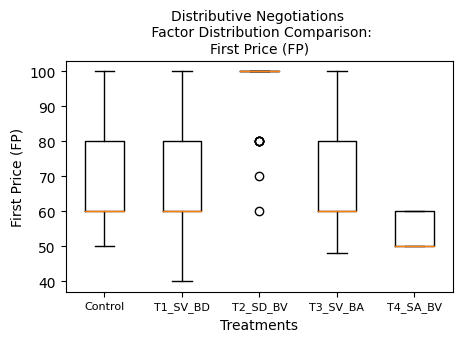

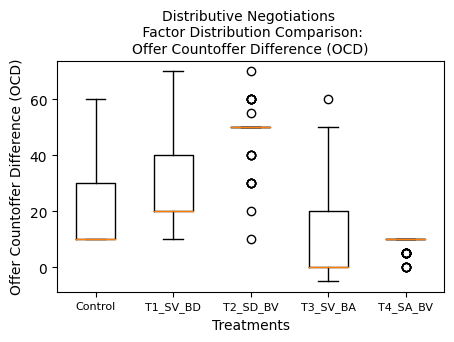

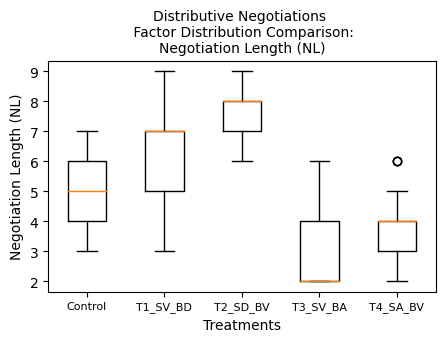

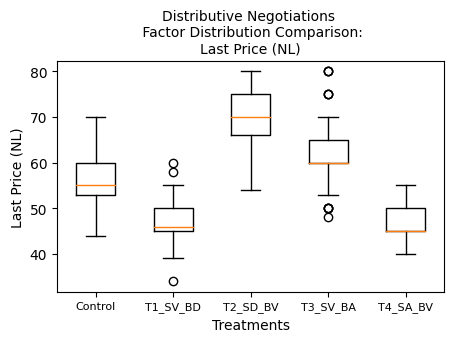

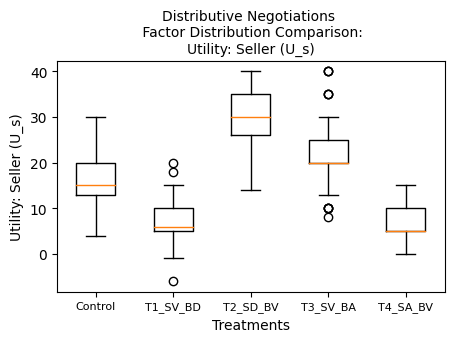

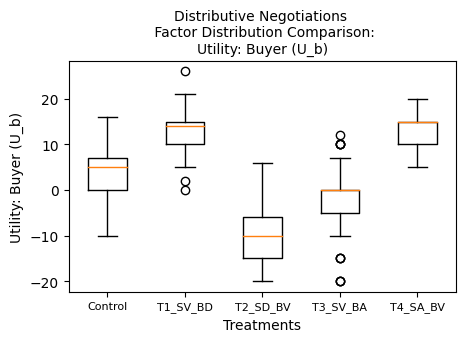

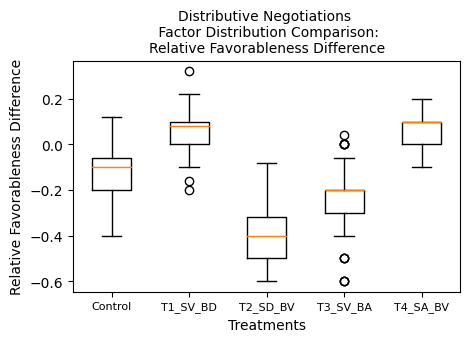

In [210]:
import matplotlib.pyplot as plt





DV_map = {'first_price' : 'First Price (FP)' , 'offer_counteroffer_diff' : 'Offer Countoffer Difference (OCD)',  'negotiation_length' : 'Negotiation Length (NL)', 'last_price' : 'Last Price (NL)',    'U_s' : 'Utility: Seller (U_s)', 'U_b' : 'Utility: Buyer (U_b)', 'RFD' : 'Relative Favorableness Difference'}



for i,k in enumerate([ 'first_price', 'offer_counteroffer_diff',  'negotiation_length', 'last_price',    'U_s', 'U_b', 'RFD']):

    fig,ax = plt.subplots(1,sharex=1, figsize = [5,3])

    data = [final_db_distributive_nego_accept[final_db_distributive_nego_accept['Control']==1][k].values] + [final_db_distributive_nego_accept[final_db_distributive_nego_accept[j]==1][k].values for j in ['T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV']]
    
    ax.boxplot(data)
        
    # Add labels and title
    ax.set_xlabel('Treatments')
    k_ = DV_map[k]
    ax.set_ylabel(k_)
    ax.set_title('Distributive Negotiations \n Factor Distribution Comparison:\n'+k_,  fontsize=10)
    
    # Customize x-axis ticks
    ax.set_xticks([1, 2,3,4,5], ['Control','T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV'],  fontsize=8)
    # Show the plot
    plt.savefig('Images/Distributive/Factor_Dist_'+k, dpi=600, bbox_inches="tight")
    plt.show()


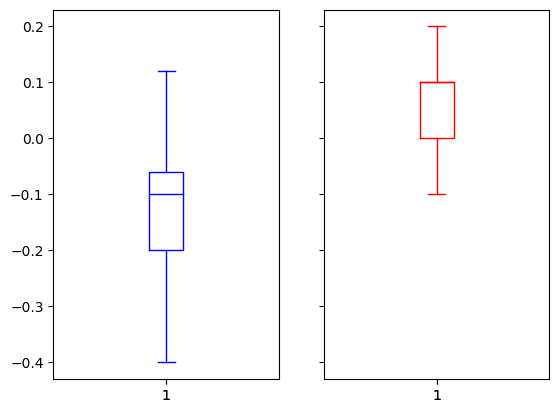

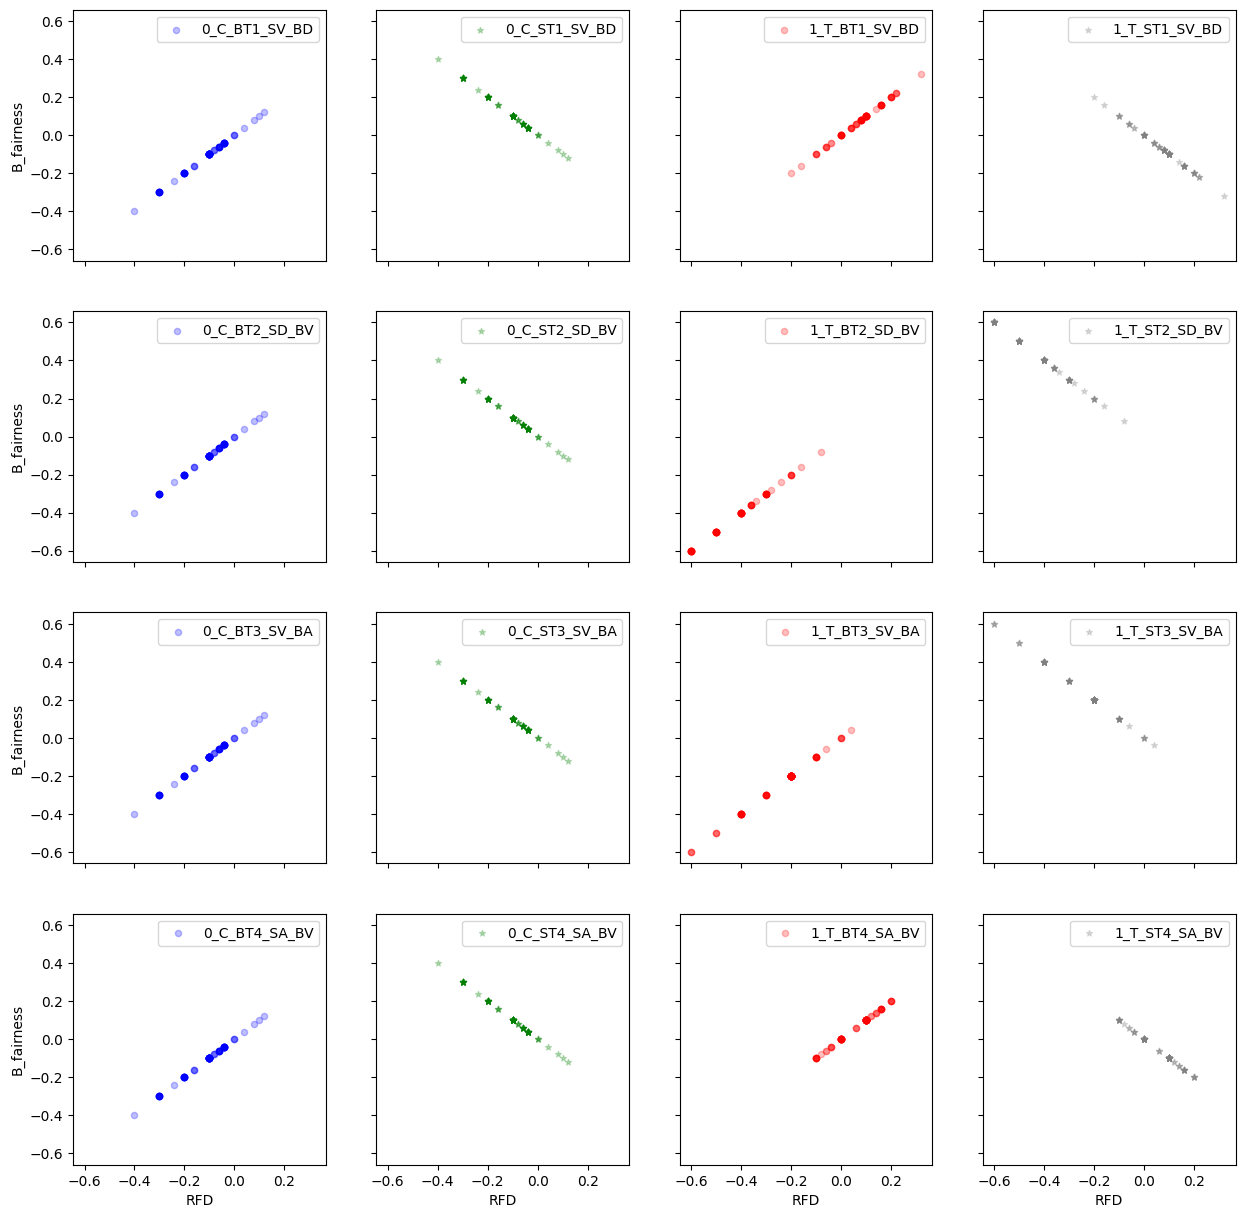

In [148]:
'U_s', 'U_b', 'B_fairness','S_fairness'


fig,ax = plt.subplots(1,2,sharey=1,sharex=1)

temp_filter_df = final_db_distributive_nego_accept[ (final_db_distributive_nego_accept[j]==1) | ( final_db_distributive_nego_accept['Control']==1)]


temp_filter_df[temp_filter_df[j]==0].plot(y='RFD',kind='box',ax = ax[0], color='b',label = '0' )
temp_filter_df[temp_filter_df[j]==1].plot(y='RFD',kind='box',ax = ax[1], color='r',label = '1' )

plt.show()

fig,ax = plt.subplots(4,4,sharey=1,sharex=1, figsize = [15,15])


for i,j in enumerate(['T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV']):
    temp_filter_df = final_db_distributive_nego_accept[ (final_db_distributive_nego_accept[j]==1) | ( final_db_distributive_nego_accept['Control']==1)]

    
    #ax[0].plot('RFD',{'B_fairness','S_fairness'],data=temp_filter_df[temp_filter_df[j]==0] )
    
    
    
    temp_filter_df[temp_filter_df[j]==0].plot(y='B_fairness',x='RFD',kind='scatter',ax = ax[i][0], color='b',label = '0_C_B'+j , alpha = 0.25, marker = 'o')
    temp_filter_df[temp_filter_df[j]==1].plot(y='B_fairness',x='RFD',kind='scatter',ax = ax[i][2], color='r',label = '1_T_B'+j , alpha = 0.25, marker = 'o')
    temp_filter_df[temp_filter_df[j]==0].plot(y='S_fairness',x='RFD',kind='scatter',ax = ax[i][1], color='g',label = '0_C_S'+j , alpha = 0.25, marker = '*')
    temp_filter_df[temp_filter_df[j]==1].plot(y='S_fairness',x='RFD',kind='scatter',ax = ax[i][3], color='gray',label = '1_T_S'+j, alpha = 0.25 , marker = '*')
plt.show()


#temp_filter_df.groupby(j).plot(x='U_b',y='B_fairness')